In [3]:
import pandas as pd

#we're changing the encoding because there prolly was some issue with Table_Data(the source of our data)
df = pd.read_csv("minwage.csv",encoding="latin")
df.to_csv("minwage.csv",encoding='utf-8',index=False)

In [5]:
df = pd.read_csv("minwage.csv")
df.head()
df.rename(columns={"Department.Of.Labor.Cleaned.Low.Value.2020.Dollars":"Low.2020"},inplace=True)
df.rename(columns={"Department.Of.Labor.Cleaned.High.Value.2020.Dollars":"High.2020"},inplace=True)
df.to_csv("minwage.csv",encoding="utf-8",index=False)
# df.rename(columns={"Department.Of.Labor.Cleaned.High.Value":"High"},inplace=True)
# df.rename(columns={"Department.Of.Labor.Cleaned.Low.Value":"Low"},inplace=True)
# df

In [30]:
 df.sort_values(by="State.Minimum.Wage").tail(10)

,Year,State,State.Minimum.Wage,State.Minimum.Wage.2020.Dollars,Federal.Minimum.Wage,Federal.Minimum.Wage.2020.Dollars,Effective.Minimum.Wage,Effective.Minimum.Wage.2020.Dollars,CPI.Average,Department.Of.Labor.Uncleaned.Data,Department.Of.Labor.Cleaned.Low.Value,Department.Of.Labor.Cleaned.Low.Value.2020.Dollars,Department.Of.Labor.Cleaned.High.Value,Department.Of.Labor.Cleaned.High.Value.2020.Dollars,Footnote
2774,2019,Maine,12.00,12.14,7.25,7.34,12.00,12.14,255.657,12,12.00,12.14,12.00,12.14,NaN
2756,2019,Arizona,12.00,12.14,7.25,7.34,12.00,12.14,255.657,12,12.00,12.14,12.00,12.14,NaN
2830,2020,Massachusetts,12.75,12.75,7.25,7.25,12.75,12.75,258.660,12.75,12.75,12.75,12.75,12.75,NaN
2776,2019,Massachusetts,12.75,12.90,7.25,7.34,12.75,12.90,255.657,12.75,12.75,12.90,12.75,12.90,NaN
2812,2020,California,13.00,13.00,7.25,7.25,13.00,13.00,258.660,13,13.00,13.00,13.00,13.00,NaN
2708,2018,District of Columbia,13.25,13.65,7.25,7.47,13.25,13.65,251.107,13.25,13.25,13.65,13.25,13.65,NaN
2804,2019,Washington,13.50,13.66,7.25,7.34,13.50,13.66,255.657,13.5,13.50,13.66,13.50,13.66,NaN
2858,2020,Washington,13.50,13.50,7.25,7.25,13.50,13.50,258.660,13.5,13.50,13.50,13.50,13.50,NaN
2762,2019,District of Columbia,14.00,14.16,7.25,7.34,14.00,14.16,255.657,14,14.00,14.16,14.00,14.16,NaN
2816,2020,District of Columbia,14.00,14.00,7.25,7.25,14.00,14.00,258.660,14,14.00,14.00,14.00,14.00,NaN


In [31]:
#alternative way to do albany_df=df[df['region']=='Albany']
gb = df.groupby("State")
gb.get_group("Alabama").set_index("Year").head()

In [4]:
act_min_wage = pd.DataFrame()

#name is what we grouped by like the specific state, the group will be the dataframe
for name,group in df.groupby("State"):
    if act_min_wage.empty:
        print("1")
        #.rename:a dict with the original name and the new name
        act_min_wage = group.set_index("Year")[["Low.2020"]].rename(columns={"Low.2020":name})
    else:
        #we are taking all the states and the Low.2020 dataframes and joining it once we changed the column name to the state
        #this will only the min wage through out the years
        act_min_wage=act_min_wage.join(group.set_index("Year")[["Low.2020"]].rename(columns={"Low.2020":name}))
      
    
#this is now has all the low data sorted by the year
act_min_wage.head()


1


,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,Florida,...,Tennessee,Texas,U.S. Virgin Islands,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
Year,,,,,,,,,,,,,,,,,,,,,
1968,0.0,15.61,3.48,1.16,12.26,7.43,10.41,9.29,9.29,0.0,...,0.0,0.00,NaN,7.43,10.41,0.0,11.89,7.43,9.29,8.92
1969,0.0,14.80,3.30,1.10,11.63,7.05,9.87,8.81,8.81,0.0,...,0.0,0.00,NaN,7.05,9.87,0.0,11.28,7.05,8.81,8.46
1970,0.0,14.00,3.12,7.33,11.00,6.67,10.67,8.33,10.67,0.0,...,0.0,0.00,NaN,6.67,10.67,0.0,10.67,6.67,8.67,8.67
1971,0.0,13.41,2.99,7.03,10.54,6.39,10.22,7.98,10.22,0.0,...,0.0,0.00,NaN,6.39,10.22,0.0,10.22,6.39,8.30,8.30
1972,0.0,12.99,2.90,7.43,10.21,6.19,11.45,9.90,9.90,0.0,...,0.0,8.66,NaN,7.43,9.90,0.0,9.90,7.43,8.97,9.28


In [49]:
#brief rundown of dayaframe
act_min_wage.describe()
"""
Count:the amount of rows
mean:average(in this case it would the average min wage over the years)
std: the variations
"""
#Try graphing some of these stuff as practice

,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,Florida,...,Tennessee,Texas,U.S. Virgin Islands,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
count,53.0,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,...,53.0,53.000000,42.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000
mean,0.0,9.917736,2.917358,7.139245,9.101132,6.881698,9.212830,7.818679,8.919245,2.415283,...,0.0,5.816038,6.980238,7.079245,9.057358,6.163019,8.826038,7.486226,7.914528,5.313208
std,0.0,1.852213,4.102247,1.459132,1.418712,1.921086,1.106907,1.307834,1.932959,3.882305,...,0.0,2.240879,1.815899,0.824707,1.093119,2.749633,2.147933,0.866017,0.778113,2.004899
min,0.0,7.620000,0.000000,1.100000,6.630000,3.970000,7.040000,4.550000,5.690000,0.000000,...,0.0,0.000000,4.430000,4.950000,7.030000,0.000000,4.550000,5.770000,6.630000,2.340000
25%,0.0,8.590000,0.000000,6.780000,8.000000,5.250000,8.200000,7.320000,7.420000,0.000000,...,0.0,4.990000,5.225000,6.610000,8.060000,6.250000,7.610000,6.850000,7.320000,3.500000
50%,0.0,9.260000,0.000000,7.210000,9.010000,6.670000,9.430000,8.170000,8.840000,0.000000,...,0.0,6.360000,7.105000,7.220000,9.240000,7.210000,9.700000,7.370000,7.810000,5.550000
75%,0.0,10.510000,8.290000,7.740000,9.710000,8.430000,9.870000,8.620000,9.600000,8.210000,...,0.0,7.350000,8.270000,7.660000,9.820000,7.810000,10.180000,7.930000,8.340000,6.820000
max,0.0,15.610000,12.140000,10.000000,13.000000,12.140000,11.450000,9.900000,14.160000,8.790000,...,0.0,8.660000,10.620000,8.600000,11.090000,9.090000,13.660000,9.430000,9.980000,9.280000


In [10]:
#corr:correlations
act_min_wage.corr().head()
act_min_wage.corr().describe()

,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,Florida,...,Tennessee,Texas,U.S. Virgin Islands,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
count,0.0,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,...,0.0,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000
mean,NaN,0.185633,0.373857,0.249423,0.394769,0.363844,0.409321,0.337871,0.443109,0.329579,...,NaN,0.174696,-0.107439,0.356157,0.457609,0.130425,0.417675,0.452075,0.239799,0.195802
std,NaN,0.477027,0.324403,0.275314,0.367941,0.350082,0.361712,0.309912,0.307777,0.346892,...,NaN,0.373110,0.359727,0.262540,0.349394,0.398850,0.349117,0.264744,0.381216,0.400326
min,NaN,-0.593675,-0.708424,-0.332127,-0.427373,-0.763597,-0.411766,-0.466054,-0.557976,-0.801164,...,NaN,-0.616811,-0.616811,-0.392828,-0.455545,-0.593675,-0.637575,-0.512307,-0.452995,-0.642386
25%,NaN,-0.193062,0.200862,0.080528,0.129542,0.157845,0.106585,0.178376,0.271810,0.193478,...,NaN,-0.037643,-0.421255,0.182321,0.236875,-0.172164,0.185268,0.371486,-0.061231,-0.172678
50%,NaN,0.278029,0.428242,0.271834,0.443946,0.433139,0.520931,0.372261,0.467803,0.390880,...,NaN,0.125887,-0.198319,0.350648,0.532401,0.070927,0.476473,0.500789,0.251923,0.328834
75%,NaN,0.618329,0.602170,0.428403,0.649967,0.612062,0.700081,0.518481,0.700081,0.551091,...,NaN,0.435600,0.166788,0.551383,0.733913,0.521108,0.691863,0.617748,0.513456,0.542144
max,NaN,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,NaN,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [51]:
df.head()
#we will see that some are just ... or just 0

,Year,State,State.Minimum.Wage,State.Minimum.Wage.2020.Dollars,Federal.Minimum.Wage,Federal.Minimum.Wage.2020.Dollars,Effective.Minimum.Wage,Effective.Minimum.Wage.2020.Dollars,CPI.Average,Department.Of.Labor.Uncleaned.Data,Department.Of.Labor.Cleaned.Low.Value,Low.2020,Department.Of.Labor.Cleaned.High.Value,High.2020,Footnote
0,1968,Alabama,0.00000,0.00,1.15,8.55,1.15,8.55,34.8,...,0.00000,0.00,0.00000,0.00,NaN
1,1968,Alaska,2.10000,15.61,1.15,8.55,2.10,15.61,34.8,2.1,2.10000,15.61,2.10000,15.61,NaN
2,1968,Arizona,0.46800,3.48,1.15,8.55,1.15,8.55,34.8,18.72 - 26.40/wk(b),0.46800,3.48,0.66000,4.91,(b)
3,1968,Arkansas,0.15625,1.16,1.15,8.55,1.15,8.55,34.8,1.25/day(b),0.15625,1.16,0.15625,1.16,(b)
4,1968,California,1.65000,12.26,1.15,8.55,1.65,12.26,34.8,1.65(b),1.65000,12.26,1.65000,12.26,(b)


In [8]:
issue_df = df[df['Low.2020']==0]
issue_df.head()

,Year,State,State.Minimum.Wage,State.Minimum.Wage.2020.Dollars,Federal.Minimum.Wage,Federal.Minimum.Wage.2020.Dollars,Effective.Minimum.Wage,Effective.Minimum.Wage.2020.Dollars,CPI.Average,Department.Of.Labor.Uncleaned.Data,Department.Of.Labor.Cleaned.Low.Value,Low.2020,Department.Of.Labor.Cleaned.High.Value,High.2020,Footnote
0,1968,Alabama,0.0,0.0,1.15,8.55,1.15,8.55,34.8,...,0.0,0.0,0.0,0.0,NaN
9,1968,Florida,0.0,0.0,1.15,8.55,1.15,8.55,34.8,...,0.0,0.0,0.0,0.0,NaN
10,1968,Georgia,0.0,0.0,1.15,8.55,1.15,8.55,34.8,...,0.0,0.0,0.0,0.0,NaN
14,1968,Illinois,0.0,0.0,1.15,8.55,1.15,8.55,34.8,...,0.0,0.0,0.0,0.0,NaN
16,1968,Iowa,0.0,0.0,1.15,8.55,1.15,8.55,34.8,...,0.0,0.0,0.0,0.0,NaN


In [54]:
#there are all the states with issues
issue_df["State"].unique()

array(['Alabama', 'Florida', 'Georgia', 'Illinois', 'Iowa', 'Kansas',
       'Louisiana', 'Mississippi', 'Missouri', 'Montana',
       'South Carolina', 'Tennessee', 'Texas', 'Virginia', 'Arizona'],
      dtype=object)

In [55]:
import numpy as np

#replacing all instances of 0 with nan
act_min_wage.replace(0,np.nan).dropna(axis=1)
#axis=1 means that we dropping the na in the COLUMNS, not rows, if a column contains na it will be dropped
#the default is axis=0 so any rows with na will be deleted


act_min_wage.replace(0,np.nan).dropna(axis=1).corr().head()

,Alaska,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,Guam,Hawaii,Idaho,...,Oregon,Pennsylvania,Rhode Island,South Dakota,Utah,Vermont,Washington,West Virginia,Wisconsin,Wyoming
Alaska,1.000000,-0.332127,0.622245,-0.078678,0.646909,0.260265,0.271810,0.787515,0.630212,0.371745,...,0.010495,0.590298,0.610099,-0.287259,-0.017546,0.615675,0.378141,0.056924,0.683108,0.726771
Arkansas,-0.332127,1.000000,0.030265,0.333597,0.183662,0.107639,0.433775,0.037006,0.324870,0.008276,...,0.399650,0.065998,0.160773,0.826094,0.208586,0.236875,0.130825,0.504703,-0.069024,-0.235369
California,0.622245,0.030265,1.000000,0.649967,0.881831,0.518481,0.727373,0.411729,0.610784,0.542006,...,0.572160,0.241669,0.816544,0.171242,0.367924,0.894617,0.816087,0.492809,0.382444,0.598739
Colorado,-0.078678,0.333597,0.649967,1.000000,0.520931,0.581162,0.798145,-0.152291,0.291995,0.436981,...,0.733803,-0.229508,0.559646,0.519677,0.538775,0.581318,0.721208,0.623479,-0.101133,0.095454
Connecticut,0.646909,0.183662,0.881831,0.520931,1.000000,0.586472,0.700081,0.587469,0.674581,0.536894,...,0.480491,0.408964,0.829952,0.228521,0.307922,0.911003,0.760697,0.484080,0.468287,0.752009


In [56]:
min_wage_corr = act_min_wage.replace(0,np.nan).dropna(axis=1).corr()
for problem in issue_df["State"].unique():
    if problem in min_wage_corr.columns:
        print("something missing here")

,Year,State,State.Minimum.Wage,State.Minimum.Wage.2020.Dollars,Federal.Minimum.Wage,Federal.Minimum.Wage.2020.Dollars,Effective.Minimum.Wage,Effective.Minimum.Wage.2020.Dollars,CPI.Average,Department.Of.Labor.Uncleaned.Data,Department.Of.Labor.Cleaned.Low.Value,Low.2020,Department.Of.Labor.Cleaned.High.Value,High.2020,Footnote
0,1968,Alabama,0.0,0.0,1.15,8.55,1.15,8.55,34.80,...,0.0,0.0,0.0,0.0,NaN
9,1968,Florida,0.0,0.0,1.15,8.55,1.15,8.55,34.80,...,0.0,0.0,0.0,0.0,NaN
10,1968,Georgia,0.0,0.0,1.15,8.55,1.15,8.55,34.80,...,0.0,0.0,0.0,0.0,NaN
14,1968,Illinois,0.0,0.0,1.15,8.55,1.15,8.55,34.80,...,0.0,0.0,0.0,0.0,NaN
16,1968,Iowa,0.0,0.0,1.15,8.55,1.15,8.55,34.80,...,0.0,0.0,0.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2808,2020,Alabama,0.0,0.0,7.25,7.25,7.25,7.25,258.66,...,0.0,0.0,0.0,0.0,NaN
2827,2020,Louisiana,0.0,0.0,7.25,7.25,7.25,7.25,258.66,...,0.0,0.0,0.0,0.0,NaN
2833,2020,Mississippi,0.0,0.0,7.25,7.25,7.25,7.25,258.66,...,0.0,0.0,0.0,0.0,NaN
2850,2020,South Carolina,0.0,0.0,7.25,7.25,7.25,7.25,258.66,...,0.0,0.0,0.0,0.0,NaN


In [10]:
grouped_issue = issue_df.groupby("State")

grouped_issue.get_group("Alabama").head()

,Year,State,State.Minimum.Wage,State.Minimum.Wage.2020.Dollars,Federal.Minimum.Wage,Federal.Minimum.Wage.2020.Dollars,Effective.Minimum.Wage,Effective.Minimum.Wage.2020.Dollars,CPI.Average,Department.Of.Labor.Uncleaned.Data,Department.Of.Labor.Cleaned.Low.Value,Low.2020,Department.Of.Labor.Cleaned.High.Value,High.2020,Footnote
0,1968,Alabama,0.0,0.0,1.15,8.55,1.15,8.55,34.8,...,0.0,0.0,0.0,0.0,NaN
54,1969,Alabama,0.0,0.0,1.15,8.11,1.15,8.11,36.7,...,0.0,0.0,0.0,0.0,NaN
108,1970,Alabama,0.0,0.0,1.30,8.67,1.30,8.67,38.8,...,0.0,0.0,0.0,0.0,NaN
162,1971,Alabama,0.0,0.0,1.30,8.30,1.30,8.30,40.5,...,0.0,0.0,0.0,0.0,NaN
216,1972,Alabama,0.0,0.0,1.60,9.90,1.60,9.90,41.8,...,0.0,0.0,0.0,0.0,NaN


In [11]:
#this is shows how we will never get for the states with issues, because they '0' or na as their data
grouped_issue.get_group("Alabama")['Low.2020'].sum()

0.0

In [21]:
for state,data in grouped_issue:
    #the data is our dataframe
    if data["Low.2020"].sum() == 0.0:
#         print(data)
        pass


In [19]:
import numpy as np

act_min_wage = pd.DataFrame()

for name,group in df.groupby("State"):
    if act_min_wage.empty:
        act_min_wage = group.set_index("Year")[["Low.2020"]].rename(columns={"Low.2020":name})
    else:
        act_min_wage=act_min_wage.join(group.set_index("Year")[["Low.2020"]].rename(columns={"Low.2020":name}))
      
    
min_wage_corr = act_min_wage.replace(0,np.nan).dropna(axis=1).corr()
min_wage_corr.head()


,Alaska,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,Guam,Hawaii,Idaho,...,Oregon,Pennsylvania,Rhode Island,South Dakota,Utah,Vermont,Washington,West Virginia,Wisconsin,Wyoming
Alaska,1.000000,-0.332127,0.622245,-0.078678,0.646909,0.260265,0.271810,0.787515,0.630212,0.371745,...,0.010495,0.590298,0.610099,-0.287259,-0.017546,0.615675,0.378141,0.056924,0.683108,0.726771
Arkansas,-0.332127,1.000000,0.030265,0.333597,0.183662,0.107639,0.433775,0.037006,0.324870,0.008276,...,0.399650,0.065998,0.160773,0.826094,0.208586,0.236875,0.130825,0.504703,-0.069024,-0.235369
California,0.622245,0.030265,1.000000,0.649967,0.881831,0.518481,0.727373,0.411729,0.610784,0.542006,...,0.572160,0.241669,0.816544,0.171242,0.367924,0.894617,0.816087,0.492809,0.382444,0.598739
Colorado,-0.078678,0.333597,0.649967,1.000000,0.520931,0.581162,0.798145,-0.152291,0.291995,0.436981,...,0.733803,-0.229508,0.559646,0.519677,0.538775,0.581318,0.721208,0.623479,-0.101133,0.095454
Connecticut,0.646909,0.183662,0.881831,0.520931,1.000000,0.586472,0.700081,0.587469,0.674581,0.536894,...,0.480491,0.408964,0.829952,0.228521,0.307922,0.911003,0.760697,0.484080,0.468287,0.752009


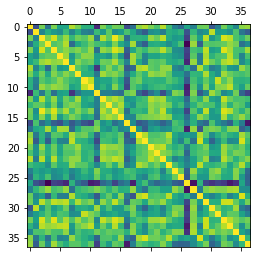

In [26]:
import matplotlib.pyplot as plt

#this is used to arrange an array as a matrix
#https://www.geeksforgeeks.org/matplotlib-pyplot-matshow-in-python/
plt.matshow(min_wage_corr)

[Text(0, 1, 'Al'),
 Text(1, 1, 'Ar'),
 Text(2, 1, 'Ca'),
 Text(3, 1, 'Co'),
 Text(4, 1, 'Co'),
 Text(5, 1, 'De'),
 Text(6, 1, 'Di'),
 Text(7, 1, 'Gu'),
 Text(8, 1, 'Ha'),
 Text(9, 1, 'Id'),
 Text(10, 1, 'In'),
 Text(11, 1, 'Ke'),
 Text(12, 1, 'Ma'),
 Text(13, 1, 'Ma'),
 Text(14, 1, 'Ma'),
 Text(15, 1, 'Mi'),
 Text(16, 1, 'Mi'),
 Text(17, 1, 'Ne'),
 Text(18, 1, 'Ne'),
 Text(19, 1, 'Ne'),
 Text(20, 1, 'Ne'),
 Text(21, 1, 'Ne'),
 Text(22, 1, 'Ne'),
 Text(23, 1, 'No'),
 Text(24, 1, 'No'),
 Text(25, 1, 'Oh'),
 Text(26, 1, 'Ok'),
 Text(27, 1, 'Or'),
 Text(28, 1, 'Pe'),
 Text(29, 1, 'Rh'),
 Text(30, 1, 'So'),
 Text(31, 1, 'Ut'),
 Text(32, 1, 'Ve'),
 Text(33, 1, 'Wa'),
 Text(34, 1, 'We'),
 Text(35, 1, 'Wi'),
 Text(36, 1, 'Wy')]

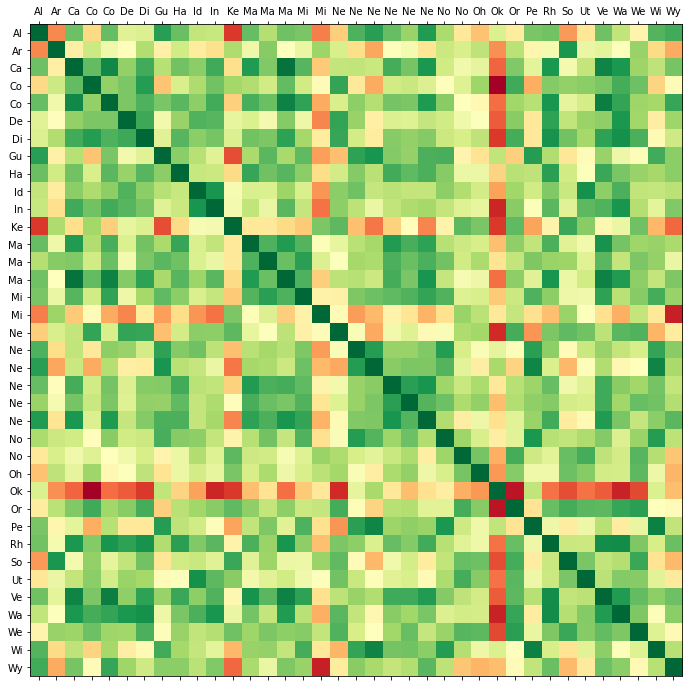

In [42]:
#this take the first 2 letters of our states
#alabama: al, michigan: mi
labels = [c[:2] for c in min_wage_corr.columns]

fig = plt.figure(figsize=(12,12))
#all the subplots within our fig are in 1 by 1 grid and this is the first one, and there will only be 1 graph
ax = fig.add_subplot(111)

#cmap:color map
ax.matshow(min_wage_corr,cmap=plt.cm.RdYlGn)

#this is telling matplotlib to show all the labels
ax.set_yticks(np.arange(len(labels)))
ax.set_xticks(np.arange(len(labels)))


ax.set_yticklabels(labels)
ax.set_xticklabels(labels)



In [43]:
labels
#we see some are duplicated

['Al',
 'Ar',
 'Ca',
 'Co',
 'Co',
 'De',
 'Di',
 'Gu',
 'Ha',
 'Id',
 'In',
 'Ke',
 'Ma',
 'Ma',
 'Ma',
 'Mi',
 'Mi',
 'Ne',
 'Ne',
 'Ne',
 'Ne',
 'Ne',
 'Ne',
 'No',
 'No',
 'Oh',
 'Ok',
 'Or',
 'Pe',
 'Rh',
 'So',
 'Ut',
 'Ve',
 'Wa',
 'We',
 'Wi',
 'Wy']

In [4]:
import pandas as pd
# # if there is issues then apply this
# import requests

# web = requests.get("https://www.infoplease.com/state-abbreviations-and-state-postal-codes")
# dfs = pd.read_html(web.text)

#bringing/reading in data from the web and this will return a list of dataframes
#parse:to break up a sentence or group of words into separate components
#pandas will parse through the website looking for any dataframes then will return it in a list, even if there's only 1 dataframe
dfs = pd.read_html("https://www.infoplease.com/state-abbreviations-and-state-postal-codes")


In [6]:
state_abbv = dfs[0]
#so we don't have keep requesting from the website
"""
index=False
This is because every time we save a csv file, pandas assume that we want to save our index
and since csv doesn't understand an index, everytime we save and load ou csv file, there will be more and more unwanted index columns
making it False will make it so that pandas won't save our index
"""
state_abbv.to_csv("abbv.csv",index=False)
state_abbv.head()

"""
alternative way for index=True:
index_col=0: makes sure our the 0 1 2 3 will always be our index col
or 
use index_col=0 and index=True so we won't even see the index
"""
state_abbv=pd.read_csv("abbv.csv",index_col=0)
state_abbv.head()

,Abbreviation,Postal Code
State/District,,
Alabama,Ala.,AL
Alaska,Alaska,AK
Arizona,Ariz.,AZ
Arkansas,Ark.,AR
California,Calif.,CA


In [7]:
state_abbv = pd.read_csv("abbv.csv")
state_abbv.head()
#"Unamed:0" is the unwanted index column

,State/District,Abbreviation,Postal Code
0,Alabama,Ala.,AL
1,Alaska,Alaska,AK
2,Arizona,Ariz.,AZ
3,Arkansas,Ark.,AR
4,California,Calif.,CA


In [13]:
abbv_dict = state_abbv[["Postal Code"]].to_dict()
abbv_dict = abbv_dict["Postal Code"]
abbv_dict = abbv
abbv_dict

{'Alabama': 'AL',
 'Alaska': 'AK',
 'Arizona': 'AZ',
 'Arkansas': 'AR',
 'California': 'CA',
 'Colorado': 'CO',
 'Connecticut': 'CT',
 'Delaware': 'DE',
 'District of Columbia': 'DC',
 'Florida': 'FL',
 'Georgia': 'GA',
 'Hawaii': 'HI',
 'Idaho': 'ID',
 'Illinois': 'IL',
 'Indiana': 'IN',
 'Iowa': 'IA',
 'Kansas': 'KS',
 'Kentucky': 'KY',
 'Louisiana': 'LA',
 'Maine': 'ME',
 'Maryland': 'MD',
 'Massachusetts': 'MA',
 'Michigan': 'MI',
 'Minnesota': 'MN',
 'Mississippi': 'MS',
 'Missouri': 'MO',
 'Montana': 'MT',
 'Nebraska': 'NE',
 'Nevada': 'NV',
 'New Hampshire': 'NH',
 'New Jersey': 'NJ',
 'New Mexico': 'NM',
 'New York': 'NY',
 'North Carolina': 'NC',
 'North Dakota': 'ND',
 'Ohio': 'OH',
 'Oklahoma': 'OK',
 'Oregon': 'OR',
 'Pennsylvania': 'PA',
 'Rhode Island': 'RI',
 'South Carolina': 'SC',
 'South Dakota': 'SD',
 'Tennessee': 'TN',
 'Texas': 'TX',
 'Utah': 'UT',
 'Vermont': 'VT',
 'Virginia': 'VA',
 'Washington': 'WA',
 'West Virginia': 'WV',
 'Wisconsin': 'WI',
 'Wyoming': 'WY

In [24]:
abbv_dict["Federal (FLSA)"] = "FLSA"
abbv_dict["Guam"] = "GU"
abbv_dict["Puerto Rico"] = "PR"

In [25]:
labels = [abbv_dict[c] for c in min_wage_corr.columns]

[Text(0, 1, 'AK'),
 Text(1, 1, 'AR'),
 Text(2, 1, 'CA'),
 Text(3, 1, 'CO'),
 Text(4, 1, 'CT'),
 Text(5, 1, 'DE'),
 Text(6, 1, 'DC'),
 Text(7, 1, 'GU'),
 Text(8, 1, 'HI'),
 Text(9, 1, 'ID'),
 Text(10, 1, 'IN'),
 Text(11, 1, 'KY'),
 Text(12, 1, 'ME'),
 Text(13, 1, 'MD'),
 Text(14, 1, 'MA'),
 Text(15, 1, 'MI'),
 Text(16, 1, 'MN'),
 Text(17, 1, 'NE'),
 Text(18, 1, 'NV'),
 Text(19, 1, 'NH'),
 Text(20, 1, 'NJ'),
 Text(21, 1, 'NM'),
 Text(22, 1, 'NY'),
 Text(23, 1, 'NC'),
 Text(24, 1, 'ND'),
 Text(25, 1, 'OH'),
 Text(26, 1, 'OK'),
 Text(27, 1, 'OR'),
 Text(28, 1, 'PA'),
 Text(29, 1, 'RI'),
 Text(30, 1, 'SD'),
 Text(31, 1, 'UT'),
 Text(32, 1, 'VT'),
 Text(33, 1, 'WA'),
 Text(34, 1, 'WV'),
 Text(35, 1, 'WI'),
 Text(36, 1, 'WY')]

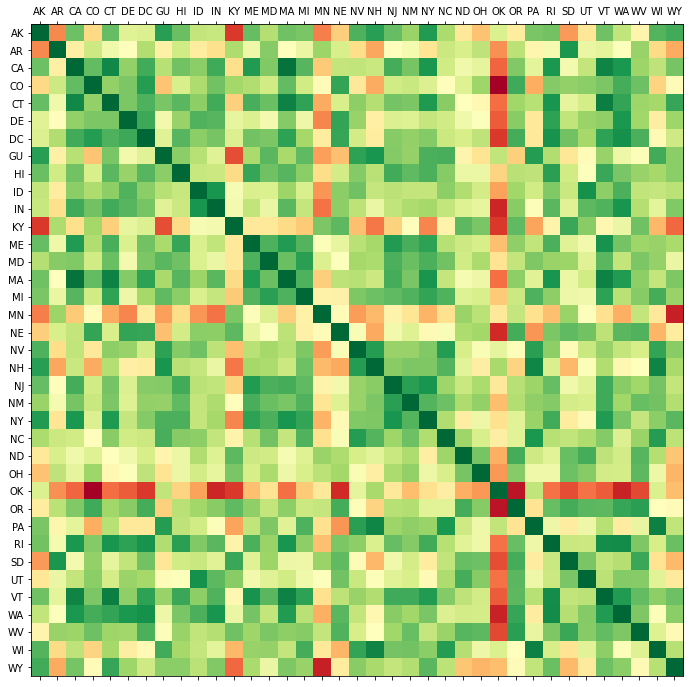

In [28]:
import matplotlib.pyplot as plt
labels = [abbv_dict[c] for c in min_wage_corr.columns]
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111)

ax.matshow(min_wage_corr,cmap=plt.cm.RdYlGn)

#this is telling matplotlib to show all the labels
ax.set_yticks(np.arange(len(labels)))
ax.set_xticks(np.arange(len(labels)))


ax.set_yticklabels(labels)
ax.set_xticklabels(labels)


In [29]:
"""Combining multiple datasets - Data Analysis with Python 3 and Pandas"""
import pandas as pd
import numpy as np

df = pd.read_csv("minwage.csv",encoding="latin")

unemp_county=pd.read_csv("employ/output.csv")
unemp_county.head()

,Year,Month,State,County,Rate
0,2015,February,Mississippi,Newton County,6.1
1,2015,February,Mississippi,Panola County,9.4
2,2015,February,Mississippi,Monroe County,7.9
3,2015,February,Mississippi,Hinds County,6.1
4,2015,February,Mississippi,Kemper County,10.6


In [4]:
act_min_wage = pd.DataFrame()

for name,group in df.groupby("State"):
    if act_min_wage.empty:
        act_min_wage = group.set_index("Year")[["Low.2020"]].rename(columns={"Low.2020":name})
    else:
        act_min_wage=act_min_wage.join(group.set_index("Year")[["Low.2020"]].rename(columns={"Low.2020":name}))
act_min_wage.head()

,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,Florida,...,Tennessee,Texas,U.S. Virgin Islands,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
Year,,,,,,,,,,,,,,,,,,,,,
1968,0.0,15.61,3.48,1.16,12.26,7.43,10.41,9.29,9.29,0.0,...,0.0,0.00,NaN,7.43,10.41,0.0,11.89,7.43,9.29,8.92
1969,0.0,14.80,3.30,1.10,11.63,7.05,9.87,8.81,8.81,0.0,...,0.0,0.00,NaN,7.05,9.87,0.0,11.28,7.05,8.81,8.46
1970,0.0,14.00,3.12,7.33,11.00,6.67,10.67,8.33,10.67,0.0,...,0.0,0.00,NaN,6.67,10.67,0.0,10.67,6.67,8.67,8.67
1971,0.0,13.41,2.99,7.03,10.54,6.39,10.22,7.98,10.22,0.0,...,0.0,0.00,NaN,6.39,10.22,0.0,10.22,6.39,8.30,8.30
1972,0.0,12.99,2.90,7.43,10.21,6.19,11.45,9.90,9.90,0.0,...,0.0,8.66,NaN,7.43,9.90,0.0,9.90,7.43,8.97,9.28


In [5]:
act_min_wage=act_min_wage.replace(0,np.nan).dropna(axis=1)
act_min_wage.head()

,Alaska,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,Guam,Hawaii,Idaho,...,Oregon,Pennsylvania,Rhode Island,South Dakota,Utah,Vermont,Washington,West Virginia,Wisconsin,Wyoming
Year,,,,,,,,,,,,,,,,,,,,,
1968,15.61,1.16,12.26,7.43,10.41,9.29,9.29,9.29,9.29,8.55,...,9.29,8.55,10.41,3.16,7.43,10.41,11.89,7.43,9.29,8.92
1969,14.80,1.10,11.63,7.05,9.87,8.81,8.81,8.81,8.81,8.11,...,8.81,8.11,9.87,3.00,7.05,9.87,11.28,7.05,8.81,8.46
1970,14.00,7.33,11.00,6.67,10.67,8.33,10.67,10.67,10.67,8.33,...,8.33,8.67,10.67,6.67,6.67,10.67,10.67,6.67,8.67,8.67
1971,13.41,7.03,10.54,6.39,10.22,7.98,10.22,10.22,10.22,7.98,...,7.98,8.30,10.22,6.39,6.39,10.22,10.22,6.39,8.30,8.30
1972,12.99,7.43,10.21,6.19,11.45,9.90,9.90,11.76,9.90,8.66,...,7.74,9.90,9.90,6.19,7.43,9.90,9.90,7.43,8.97,9.28


In [28]:
def get_min_wage(year,state):
    try:
        return act_min_wage.loc[year,state]
    except:
        return np.NaN
print(get_min_wage(1968,"Aaska"))

15.61


In [35]:
%%time
#ipython notebook specific command
unemp_county['min_wage']=list(map(get_min_wage,unemp_county["Year"],unemp_county["State"]))

CPU times: user 46.9 s, sys: 470 ms, total: 47.3 s
Wall time: 50.8 s


In [39]:
unemp_county.head()

,Year,Month,State,County,Rate,min_wage
0,2015,February,Mississippi,Newton County,6.1,NaN
1,2015,February,Mississippi,Panola County,9.4,NaN
2,2015,February,Mississippi,Monroe County,7.9,NaN
3,2015,February,Mississippi,Hinds County,6.1,NaN
4,2015,February,Mississippi,Kemper County,10.6,NaN


In [37]:
unemp_county[["Rate","min_wage"]].corr()

,Rate,min_wage
Rate,1.000000,0.153035
min_wage,0.153035,1.000000


In [40]:
#their variance/co variance
unemp_county[["Rate","min_wage"]].cov()

,Rate,min_wage
Rate,9.687873,0.673099
min_wage,0.673099,2.000364


In [45]:
pres16 = pd.read_csv("pres16results.csv")
pres16.head()

,county,fips,cand,st,pct_report,votes,total_votes,pct,lead
0,NaN,US,Donald Trump,US,0.9951,60350241.0,127592176.0,0.472993,Donald Trump
1,NaN,US,Hillary Clinton,US,0.9951,60981118.0,127592176.0,0.477938,Donald Trump
2,NaN,US,Gary Johnson,US,0.9951,4164589.0,127592176.0,0.032640,Donald Trump
3,NaN,US,Jill Stein,US,0.9951,1255968.0,127592176.0,0.009844,Donald Trump
4,NaN,US,Evan McMullin,US,0.9951,451636.0,127592176.0,0.003540,Donald Trump


In [60]:
county_2015=unemp_county.copy()[(unemp_county["Year"]==2015)&(unemp_county["Month"]=="February")]

In [61]:
county_2015.head()

,Year,Month,State,County,Rate,min_wage
0,2015,February,Mississippi,Newton County,6.1,NaN
1,2015,February,Mississippi,Panola County,9.4,NaN
2,2015,February,Mississippi,Monroe County,7.9,NaN
3,2015,February,Mississippi,Hinds County,6.1,NaN
4,2015,February,Mississippi,Kemper County,10.6,NaN


In [62]:
state_abbv = pd.read_csv("abbv.csv",index_col=0)
state_abbv = state_abbv[["Postal Code"]]


In [63]:
abbv_dict = state_abbv.to_dict()["Postal Code"]

In [64]:
county_2015["State"]=county_2015["State"].map(abbv_dict)

In [68]:
pres16.columns

Index(['county', 'fips', 'cand', 'st', 'pct_report', 'votes', 'total_votes',
       'pct', 'lead'],
      dtype='object')

In [70]:
#county_2015 and pres16 have different column names
pres16.rename(columns={"county":"County","st":"State"},inplace=True)
pres16.tail()

,County,fips,cand,State,pct_report,votes,total_votes,pct,lead
18470,Yauco Municipio,72153,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18471,Midway Islands,74300,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18472,St. Croix Island,78010,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18473,St. John Island,78020,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18474,St. Thomas Island,78030,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [72]:
#joining them by index
for df in [county_2015,pres16]:
    df.set_index(["County","State"],inplace=True)

In [79]:
# pres16=pres16[pres16["cand"]=="Donald Trump"]
# pres16=pres16[["pct"]]
# pres16.dropna(inplace=True)
print(pres16.tail())
print(county_2015.head())

                          pct
County        State          
Clark County  ID     0.717314
Arthur County NE     0.901141
Kenedy County TX     0.451613
King County   TX     0.937107
Loving County TX     0.890625
                     Year     Month  Rate  min_wage
County        State                                
Newton County MS     2015  February   6.1       NaN
Panola County MS     2015  February   9.4       NaN
Monroe County MS     2015  February   7.9       NaN
Hinds County  MS     2015  February   6.1       NaN
Kemper County MS     2015  February  10.6       NaN


In [107]:
all_together=county_2015.merge(pres16,on=["County","State"])
all_together.dropna(inplace=True)
print(all_together.index)
all_together.head()

MultiIndex([(       'Major County', 'OK'),
            ('Pottawatomie County', 'OK'),
            (    'Johnston County', 'OK'),
            (   'Jefferson County', 'OK'),
            (      'Beaver County', 'OK'),
            (    'Stephens County', 'OK'),
            (     'Washita County', 'OK'),
            (    'Marshall County', 'OK'),
            (       'Atoka County', 'OK'),
            (       'Noble County', 'OK'),
            ...
            (  'Washington County', 'ME'),
            (        'York County', 'ME'),
            (       'Waldo County', 'ME'),
            (   'Penobscot County', 'ME'),
            (    'Franklin County', 'ME'),
            (    'Somerset County', 'ME'),
            (      'Oxford County', 'ME'),
            (        'Knox County', 'ME'),
            ( 'Piscataquis County', 'ME'),
            (   'Aroostook County', 'ME')],
           names=['County', 'State'], length=1557)


,,Year,Month,Rate,min_wage,pct
County,State,,,,,
Major County,OK,2015,February,2.6,2.18,0.864960
Pottawatomie County,OK,2015,February,4.5,2.18,0.701342
Johnston County,OK,2015,February,6.5,2.18,0.770057
Jefferson County,OK,2015,February,5.0,2.18,0.812367
Beaver County,OK,2015,February,2.8,2.18,0.888243


In [88]:
#axis=1: dropping the columns not the row
all_together.drop("Year",axis=1,inplace=True)
all_together.head()

,,Month,Rate,min_wage,pct
County,State,,,,
Major County,OK,February,2.6,2.18,0.864960
Pottawatomie County,OK,February,4.5,2.18,0.701342
Johnston County,OK,February,6.5,2.18,0.770057
Jefferson County,OK,February,5.0,2.18,0.812367
Beaver County,OK,February,2.8,2.18,0.888243


In [95]:
print(len(act_min_wage))
print(len(act_min_wage.corr()))
print(act_min_wage.head())
act_min_wage.corr()

53
37
      Alaska  Arkansas  California  Colorado  Connecticut  Delaware  \
Year                                                                  
1968   15.61      1.16       12.26      7.43        10.41      9.29   
1969   14.80      1.10       11.63      7.05         9.87      8.81   
1970   14.00      7.33       11.00      6.67        10.67      8.33   
1971   13.41      7.03       10.54      6.39        10.22      7.98   
1972   12.99      7.43       10.21      6.19        11.45      9.90   

      District of Columbia   Guam  Hawaii  Idaho  ...  Oregon  Pennsylvania  \
Year                                              ...                         
1968                  9.29   9.29    9.29   8.55  ...    9.29          8.55   
1969                  8.81   8.81    8.81   8.11  ...    8.81          8.11   
1970                 10.67  10.67   10.67   8.33  ...    8.33          8.67   
1971                 10.22  10.22   10.22   7.98  ...    7.98          8.30   
1972                  

,Alaska,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,Guam,Hawaii,Idaho,...,Oregon,Pennsylvania,Rhode Island,South Dakota,Utah,Vermont,Washington,West Virginia,Wisconsin,Wyoming
Alaska,1.000000,-0.332127,0.622245,-0.078678,0.646909,0.260265,0.271810,0.787515,0.630212,0.371745,...,0.010495,0.590298,0.610099,-0.287259,-0.017546,0.615675,0.378141,0.056924,0.683108,0.726771
Arkansas,-0.332127,1.000000,0.030265,0.333597,0.183662,0.107639,0.433775,0.037006,0.324870,0.008276,...,0.399650,0.065998,0.160773,0.826094,0.208586,0.236875,0.130825,0.504703,-0.069024,-0.235369
California,0.622245,0.030265,1.000000,0.649967,0.881831,0.518481,0.727373,0.411729,0.610784,0.542006,...,0.572160,0.241669,0.816544,0.171242,0.367924,0.894617,0.816087,0.492809,0.382444,0.598739
Colorado,-0.078678,0.333597,0.649967,1.000000,0.520931,0.581162,0.798145,-0.152291,0.291995,0.436981,...,0.733803,-0.229508,0.559646,0.519677,0.538775,0.581318,0.721208,0.623479,-0.101133,0.095454
Connecticut,0.646909,0.183662,0.881831,0.520931,1.000000,0.586472,0.700081,0.587469,0.674581,0.536894,...,0.480491,0.408964,0.829952,0.228521,0.307922,0.911003,0.760697,0.484080,0.468287,0.752009
Delaware,0.260265,0.107639,0.518481,0.581162,0.586472,1.000000,0.742080,0.173421,0.505127,0.695469,...,0.546410,-0.011283,0.778867,0.374813,0.503722,0.527217,0.820178,0.477105,0.024637,0.484522
District of Columbia,0.271810,0.433775,0.727373,0.798145,0.700081,0.742080,1.000000,0.258940,0.682666,0.541039,...,0.717969,-0.009684,0.837786,0.613463,0.463232,0.773468,0.844603,0.706347,0.085788,0.328834
Guam,0.787515,0.037006,0.411729,-0.152291,0.587469,0.173421,0.258940,1.000000,0.542969,0.410296,...,-0.109487,0.797490,0.432352,-0.018882,0.099315,0.504418,0.195535,0.138478,0.726536,0.542144
Hawaii,0.630212,0.324870,0.610784,0.291995,0.674581,0.505127,0.682666,0.542969,1.000000,0.354048,...,0.405437,0.382620,0.784367,0.318164,0.126257,0.745415,0.591754,0.504798,0.467383,0.544010
Idaho,0.371745,0.008276,0.542006,0.436981,0.536894,0.695469,0.541039,0.410296,0.354048,1.000000,...,0.479316,0.320966,0.571555,0.350888,0.844135,0.532401,0.708873,0.379467,0.362122,0.396824


In [96]:
all_together.corr()

,Rate,min_wage,pct
Rate,1.000000,0.186404,-0.085985
min_wage,0.186404,1.000000,-0.324942
pct,-0.085985,-0.324942,1.000000


In [97]:
all_together.cov()

,Rate,min_wage,pct
Rate,5.743199,0.705474,-0.031771
min_wage,0.705474,2.494004,-0.079120
pct,-0.031771,-0.079120,0.023772
